In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df2 = pd.read_csv('C:/Users/pejma/Nextcloud/PDE model/Revise3/folder/data/preprocessed_dataset4.csv')

In [3]:
df2.head()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_after_3_months,...,m2_rand1,m2_rand2,m2_rand3,m2_rand4,m2_rand5,T1Gd_MRI,FLAIR_MRI,m2/m1 at the core,m2/m1 at the edge,random m2/m1
0,0.007583,0.011995,0.016905,0.77513,0.001358,0.049575,0.47649,0.39058,7.7,5.0,...,17.051298,11.466250,14.781244,17.051298,17.051298,3.318854,6.011855,3.609976,3.461021,3.271834
1,0.017364,0.214110,0.052564,0.64912,0.092466,0.011697,0.19718,0.38084,57.4,15.5,...,23.700744,23.336736,23.601960,23.676358,23.719638,24.697007,49.172917,8.191630,16.334034,9.219569
2,0.025704,0.228750,0.086792,0.44058,0.041428,0.082967,0.41771,0.18997,57.4,15.0,...,23.318321,22.113603,22.950901,23.249889,23.350797,29.909090,56.070952,15.464051,25.307228,16.091996
3,0.025496,0.207690,0.093530,0.66250,0.066799,0.043951,0.19588,0.26457,58.1,14.0,...,22.929723,23.212832,23.113538,22.974069,22.913368,25.347036,50.057759,7.952829,17.101410,9.198852
4,0.003470,0.023539,0.073731,0.60801,0.033812,0.023481,0.10858,0.13663,12.6,10.5,...,3.293029,1.353164,2.681827,3.293029,3.546935,3.954359,7.686673,3.847851,2.799928,3.193474


In [4]:
# Calculate the first quartile (Q1) of the 'IW' column
Q1 = df2['IW'].quantile(0.25)
# Separate the dataset into two based on Q1
nodular = df2[df2['IW'] <= Q1]
infiltrative = df2[df2['IW'] > Q1]
nodular.describe()

,param_b,param_d,param_h2,param_r,param_h3,param_Dm,param_ts,param_S,IW,IW_after_3_months,...,m2_rand1,m2_rand2,m2_rand3,m2_rand4,m2_rand5,T1Gd_MRI,FLAIR_MRI,m2/m1 at the core,m2/m1 at the edge,random m2/m1
count,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,...,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000,5264.000000
mean,0.011108,0.058956,0.053170,0.600479,0.047409,0.050164,0.349826,0.246741,18.925931,10.660524,...,16.421746,11.395664,14.757145,16.137132,16.545752,8.634479,14.980989,8.516424,9.191979,7.969350
std,0.006841,0.051756,0.031455,0.115191,0.028512,0.028462,0.145401,0.086509,5.236238,6.742824,...,9.587534,9.183930,9.603693,9.596449,9.581841,4.106664,5.687600,6.615691,8.696266,6.403368
min,0.002731,0.002738,0.005733,0.400030,0.001001,0.001039,0.100110,0.100070,4.900000,2.500000,...,0.012880,0.004349,0.008164,0.011422,0.013529,0.679705,2.263558,0.006017,0.004407,0.004896
25%,0.005284,0.020520,0.025348,0.501273,0.022571,0.025609,0.222230,0.171558,15.400000,5.500000,...,5.872308,1.936959,4.143946,5.581219,6.048076,5.915002,10.882563,3.177178,2.174797,2.641456
50%,0.009114,0.041445,0.050140,0.601040,0.045467,0.050261,0.348900,0.245500,19.600000,8.500000,...,20.844261,10.269385,18.242860,20.460625,21.010338,8.490919,15.037946,7.300349,6.916597,6.840531
75%,0.016107,0.084335,0.079853,0.700060,0.071294,0.074868,0.475538,0.320250,23.100000,14.500000,...,24.306755,20.817567,23.381387,24.156703,24.375189,10.474228,18.537788,12.083274,13.592303,11.476586
max,0.027291,0.272950,0.113980,0.799880,0.099992,0.099981,0.599990,0.399990,25.900000,38.000000,...,44.307158,37.241538,43.302203,44.198160,44.307158,53.431769,62.651710,38.757602,75.757874,41.284023


In [5]:
# Then, proceed with your loop
# Function to add noise to a dataset
def add_noise_to_dataset(dataset, features, sigma):
    """
    Adds Gaussian noise to specified features within a dataset.
    Args:
    - dataset (pd.DataFrame): The original pandas DataFrame.
    - features (list): A list of column names to which noise will be added.
    - sigma (float): The standard deviation of the Gaussian noise.
    
    Returns:
    - pd.DataFrame: A new DataFrame with noise added to the specified features.
    """
    noisy_dataset = dataset.copy()
    for feature in features:
        if feature in noisy_dataset.columns:
            # Generate noise
            noise = np.abs(np.random.normal(0, sigma, size=dataset[feature].shape))
            # Add noise to the feature
            noisy_dataset[feature] += noise
        else:
            print(f"Feature {feature} not found in DataFrame.")
    return noisy_dataset

# Assuming df2 and nodular are already defined
np.random.seed(1)  # Ensure reproducibility

features = ['ki67', 'm2/m1 at the core', 'm2/m1 at the edge', 'random m2/m1']

# Original nodular dataset without noise
nodular_no_noise = nodular.copy()
# Weak noise (sigma=1)
nodular_weak_noise = add_noise_to_dataset(nodular, features, sigma=1)
# Moderate noise (sigma=5)
nodular_moderate_noise = add_noise_to_dataset(nodular, features, sigma=5)
# Strong noise (sigma=10)
nodular_strong_noise = add_noise_to_dataset(nodular, features, sigma=10)


# Original infiltrative dataset without noise
infiltrative_no_noise = infiltrative.copy()
# Weak noise (sigma=1)
infiltrative_weak_noise = add_noise_to_dataset(infiltrative, features, sigma=1)
# Moderate noise (sigma=5)
infiltrative_moderate_noise = add_noise_to_dataset(infiltrative, features, sigma=5)
# Strong noise (sigma=10)
infiltrative_strong_noise = add_noise_to_dataset(infiltrative, features, sigma=10)                                            

In [6]:
datasets_nodular = {
    "No Noise": nodular_no_noise,
    "Weak Noise": nodular_weak_noise,
    "Moderate Noise": nodular_moderate_noise,
    "Strong Noise": nodular_strong_noise
}
datasets_infiltrative = {
    "No Noise": infiltrative_no_noise,
    "Weak Noise": infiltrative_weak_noise,
    "Moderate Noise": infiltrative_moderate_noise,
    "Strong Noise": infiltrative_strong_noise
}

scenarios = {
    'I': ['ki67', 'T1Gd_MRI','FLAIR_MRI'],
    'II':['ki67','T1Gd_MRI','FLAIR_MRI', 'random m2/m1'],
    'III':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the core'],
    'IV':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the edge'],
    'V':['ki67','T1Gd_MRI','FLAIR_MRI','m2/m1 at the core','m2/m1 at the edge'],
}

all_datasets = {
    "Nodular": datasets_nodular,
    "Infiltrative": datasets_infiltrative
}

In [7]:
results = {'Type': [], 'Scenario': [], 'Dataset': [], 'TimePoint': [], 'MSE': []}
# Gradient Boosting Regressor
#gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
gb_optimized = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200, random_state=0)
# Single loop for processing both nodular and infiltrative datasets
for dataset_type, datasets in all_datasets.items():
    for dataset_name, dataset in datasets.items():
        for scenario_name, features in scenarios.items():
            if not all(feature in dataset.columns for feature in features):
                print(f"Skipping {scenario_name} for {dataset_name} due to missing features.")
                continue

            X = dataset[features].values
            Y = dataset['IW_after_3_months'].values
            Y2 = dataset['IW_after_12_months'].values

            # Splitting and standardizing data for IW_at1
            X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Model training and evaluation for IW_at1
            gb_optimized.fit(X_train_scaled, Y_train)
            Y_pred = gb_optimized.predict(X_test_scaled)
            mse = mean_squared_error(Y_test, Y_pred)

            # Store results for IW_at1
            results['Type'].append(dataset_type)
            results['Scenario'].append(scenario_name)
            results['Dataset'].append(dataset_name)
            results['TimePoint'].append('IW_after_3_months')
            results['MSE'].append(mse)

            # Splitting and standardizing data for IW_at3
            X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Model training and evaluation for IW_at3
            gb_optimized.fit(X_train_scaled, Y2_train)
            Y2_pred = gb_optimized.predict(X_test_scaled)
            mse2 = mean_squared_error(Y2_test, Y2_pred)

            # Store results for IW_at3
            results['Type'].append(dataset_type)
            results['Scenario'].append(scenario_name)
            results['Dataset'].append(dataset_name)
            results['TimePoint'].append('IW_after_12_months')
            results['MSE'].append(mse2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Separate results for nodular and infiltrative datasets
nodular_results_df = results_df[results_df['Type'] == "Nodular"].drop(columns=['Type'])
infiltrative_results_df = results_df[results_df['Type'] == "Infiltrative"].drop(columns=['Type'])


results_df.to_csv('C:/Users/pejma/Nextcloud/PDE model/Final2/Results_metrics_nod.csv',index = False) 

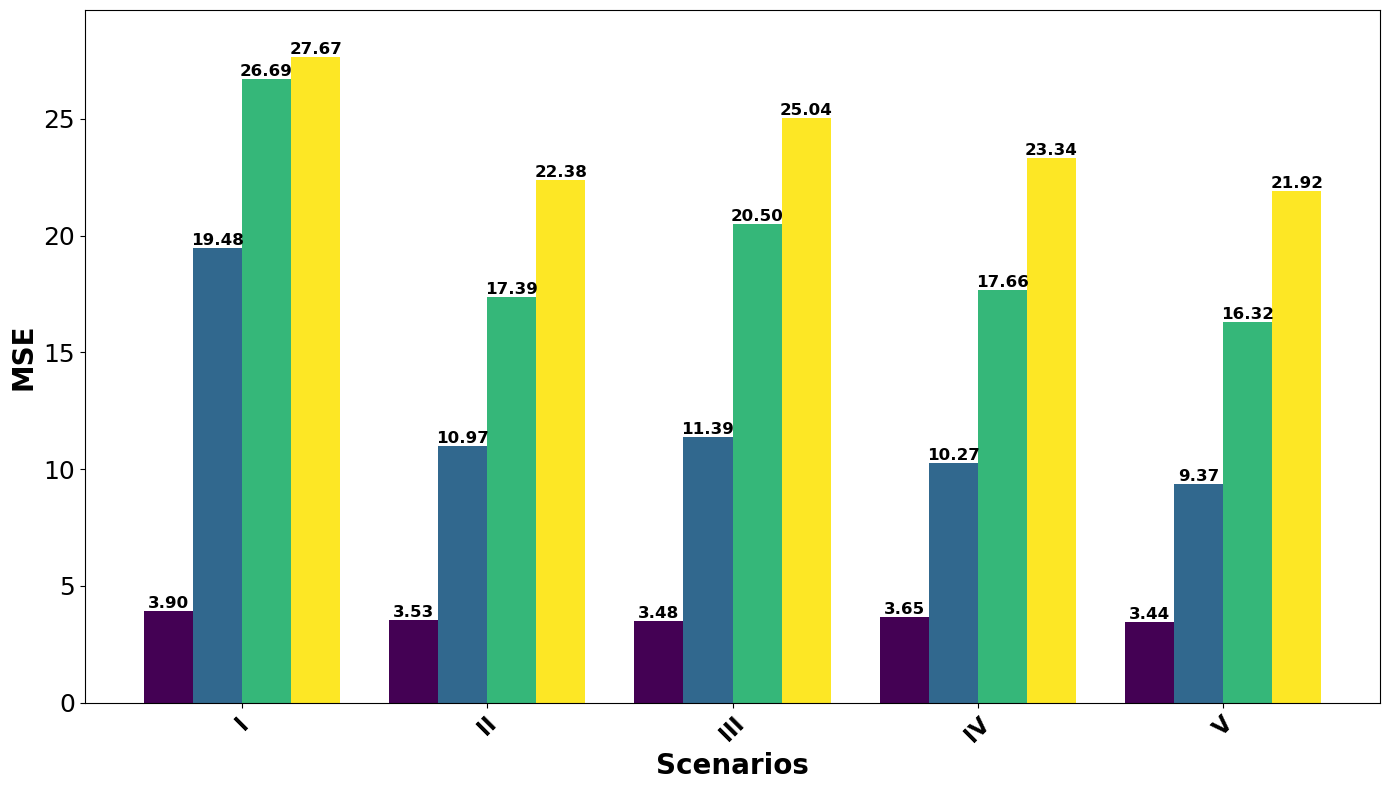

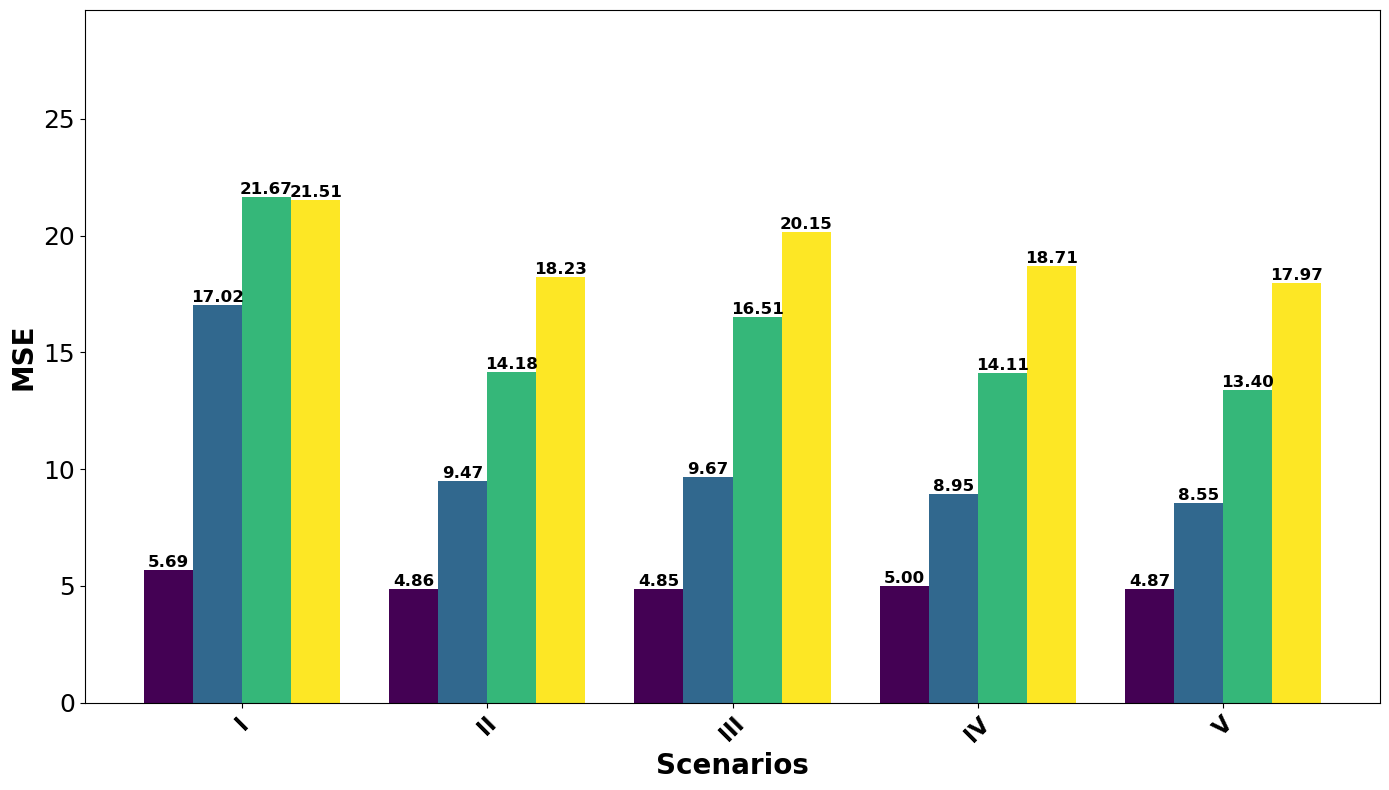

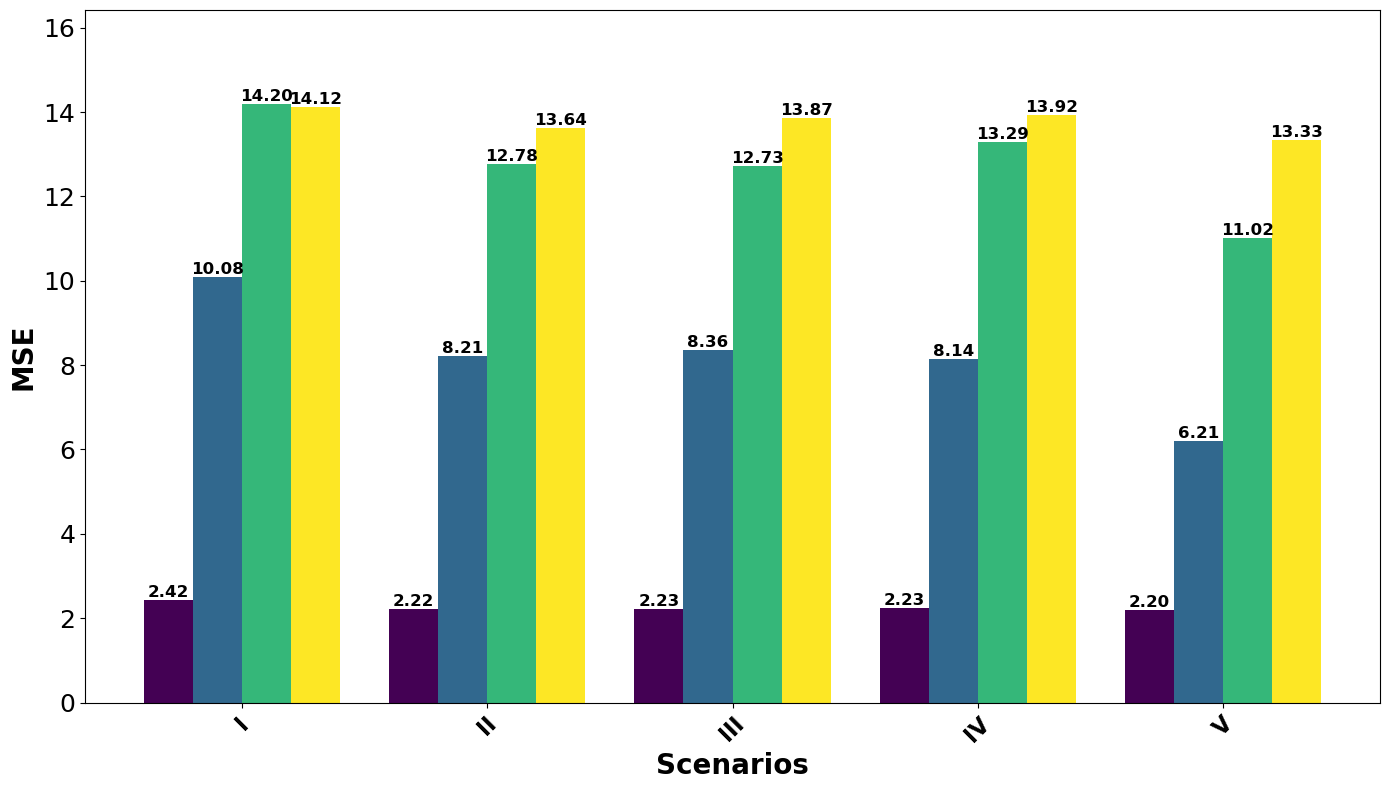

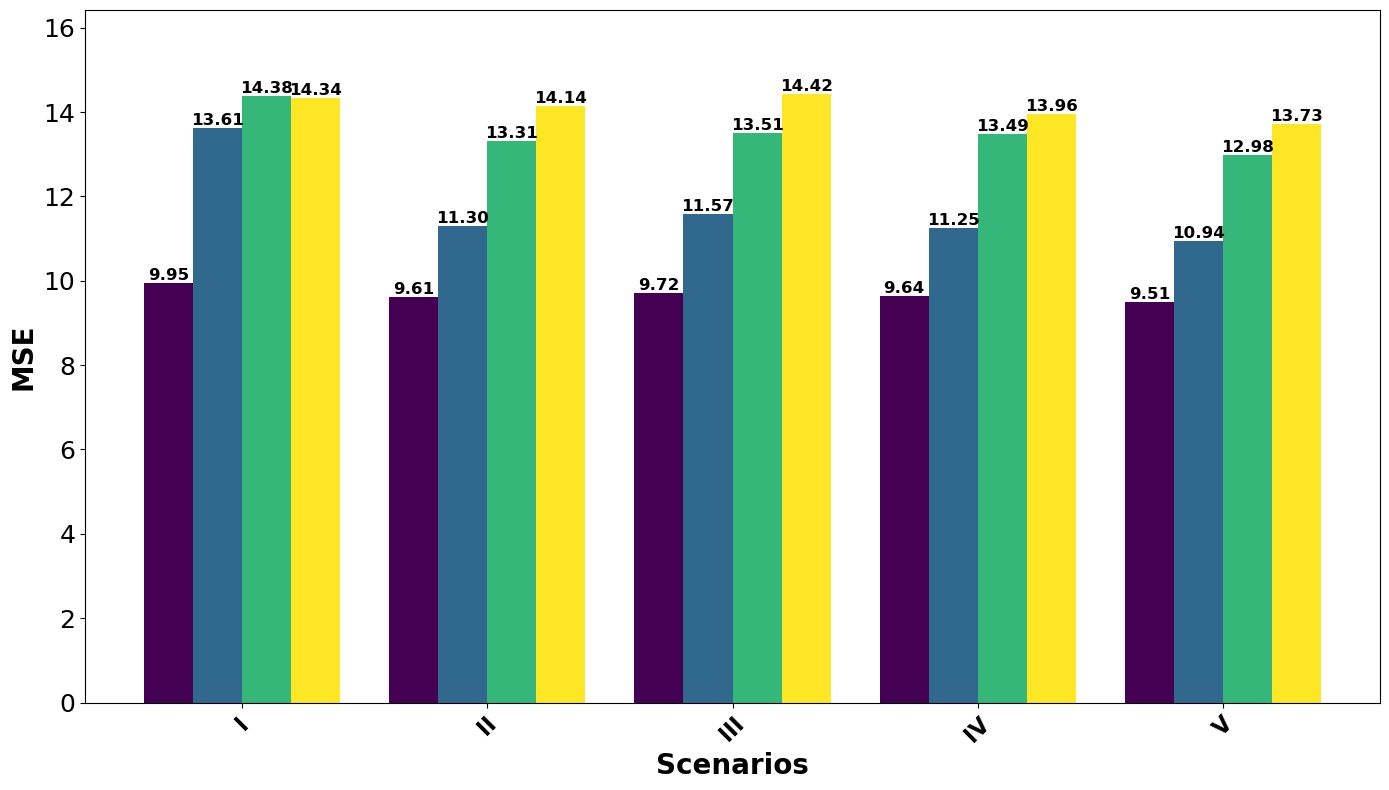

In [8]:
def plot_mse_custom(results_df, dataset_type, scenarios, output_prefix):
    """
    Plots MSE for the specified dataset type with custom colors and annotations.

    Args:
    - results_df (pd.DataFrame): DataFrame containing MSE values.
    - dataset_type (str): The type of dataset ("Nodular" or "Infiltrative").
    - scenarios (dict): Dictionary of scenario names and features.
    - output_prefix (str): Prefix for saving output files.
    """
    # Define y-axis limits based on data
    mse_min = 0  # Ensure MSE starts from 0
    mse_max = results_df['MSE'].max()

    # Define x locations for the groups
    ind = np.arange(len(scenarios))  # The x locations for the groups
    width = 0.2  # The width of the bars

    # Define custom colors for MSE
    mse_colors = plt.cm.viridis(np.linspace(0, 1, len(results_df['Dataset'].unique())))

    # Unique datasets
    datasets = results_df['Dataset'].unique()

    for time_point in ['IW_after_3_months', 'IW_after_12_months']:
        fig, ax1 = plt.subplots(figsize=(14, 8))

        # Plotting MSE bars
        for i, dataset in enumerate(datasets):
            mse_values = results_df[
                (results_df['Dataset'] == dataset) & (results_df['TimePoint'] == time_point)
            ]['MSE']
            bars = ax1.bar(
                ind + i * width, mse_values, width, color=mse_colors[i], align='center', label=f"{dataset}"
            )
            
            # Annotate MSE values on top of the bars
            for bar, value in zip(bars, mse_values):
                ax1.text(
                    bar.get_x() + bar.get_width() / 2,  # Center of the bar
                    bar.get_height(),  # Top of the bar
                    f'{value:.2f}',  # Format the value
                    ha='center', va='bottom', fontsize=12, fontweight='bold'
                )

        # Configure the plot
        ax1.set_xlabel('Scenarios', fontsize=20, fontweight='bold')
        ax1.set_ylabel('MSE', fontsize=20, fontweight='bold')
        #ax1.set_title(f'MSE for {dataset_type} Tumors ({time_point})', fontsize=22, fontweight='bold')
        ax1.set_xticks(ind + width * (len(datasets) - 1) / 2)
        ax1.set_xticklabels(scenarios.keys(), rotation=45, fontsize=16, fontweight='bold')
        ax1.set_ylim([mse_min, mse_max + 2])
        ax1.tick_params(axis='y', labelsize=18)

        # Add legend
        #ax1.legend(loc='upper left', fontsize=12)

        # Save the plot
        fig.savefig(f'{output_prefix}_{time_point}.png', format='png', dpi=300, bbox_inches='tight')

        plt.tight_layout()
        plt.show()

# Call the function for nodular and infiltrative datasets
plot_mse_custom(
    nodular_results_df, 
    "Nodular", 
    scenarios, 
    "nodular_mse"
)

plot_mse_custom(
    infiltrative_results_df, 
    "Infiltrative", 
    scenarios, 
    "infiltrative_mse"
)
